**ID - 202218061**

**ASSIGNMENT - 03**

**MACHINE LEARNING**



#Artificial Datasets

#Univariate Case :

In [ ]:
#Importing libraries
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb


#a) Generate 500 real number for the variable X from the uniform distribution U [0,1].

In [ ]:
X_train=[]
for i in range(500):
  X_train.append(random.uniform(0,1))
X_train.sort()
X_train =np.array(X_train)

#b) Construct the training set T = { (x1,y1),(x2,y2),......,(x500,y500)} using the relation Yi = sin (2 π xi) + εi , where εi ~ N(0,0.25).

In [ ]:
eps = np.array(np.random.normal(0,0.25,500))
Y_train= []
for i in range(500):
  Y_train.append(math.sin(2*math.pi*X_train[i])+eps[i])

Y_train=np.array(Y_train)

In [ ]:
T_train = np.array(tuple(zip(X_train,Y_train)))

In [ ]:
T_train

array([[ 1.14557435e-03,  5.56271779e-01],
       [ 7.16122704e-03,  3.32236078e-02],
       [ 7.89031406e-03,  3.82902267e-02],
       [ 9.57350226e-03,  3.64424778e-02],
       [ 1.01316239e-02, -3.92715569e-03],
       [ 1.15750856e-02, -4.36912469e-04],
       [ 1.22196936e-02, -2.57988688e-01],
       [ 1.33676785e-02, -6.47075540e-02],
       [ 1.44024856e-02, -1.35582383e-01],
       [ 1.50463517e-02,  1.00788337e-01],
       [ 1.68351294e-02,  1.00812243e-01],
       [ 2.05391016e-02,  1.44437638e-02],
       [ 2.20011103e-02,  4.03572296e-01],
       [ 2.37959757e-02,  2.06383848e-01],
       [ 2.81571484e-02,  3.90412253e-02],
       [ 2.85534787e-02, -3.88260413e-02],
       [ 3.16282739e-02, -3.71271251e-01],
       [ 3.20836189e-02,  2.38535231e-01],
       [ 3.40708038e-02,  9.77676635e-02],
       [ 3.42279673e-02,  2.31916751e-01],
       [ 3.51031498e-02, -1.09980499e-01],
       [ 3.70144955e-02,  7.38780757e-02],
       [ 3.70636544e-02,  2.32122931e-01],
       [ 3.

#c) In a similar way construct a testing set of size 50 Test = { (x’1,y’1),(x’2,y’2),......,(x’50,y’50)}

In [ ]:
X_test=[]
for i in range(50):
  X_test.append(random.uniform(0,1))
X_test.sort()
X_test = np.array(X_test)

In [ ]:
eps = np.array(np.random.normal(0,0.25,50))
Y_test= []
for i in range(50):
  Y_test.append(math.sin(2*math.pi*X_test[i])+eps[i])

Y_test=np.array(Y_test)

In [ ]:
T_test = np.array(tuple(zip(X_test,Y_test)))
T_test

array([[ 1.15519445e-03,  2.57966480e-02],
       [ 3.79720096e-02, -3.50611120e-02],
       [ 5.34121486e-02,  3.41348977e-01],
       [ 1.04362270e-01,  5.52758598e-01],
       [ 1.06683512e-01,  7.08475036e-01],
       [ 1.46548686e-01,  8.58107723e-01],
       [ 1.48556171e-01,  7.35609004e-01],
       [ 1.50288338e-01,  1.05138583e+00],
       [ 1.64118848e-01,  1.31537752e+00],
       [ 1.68223698e-01,  8.69554242e-01],
       [ 1.98384908e-01,  8.13229551e-01],
       [ 2.03856994e-01,  9.16169242e-01],
       [ 2.11308862e-01,  9.77515910e-01],
       [ 2.43129069e-01,  7.90762584e-01],
       [ 2.46449840e-01,  1.09561395e+00],
       [ 2.56260643e-01,  9.15160745e-01],
       [ 2.99384449e-01,  1.08406264e+00],
       [ 3.41982025e-01,  9.31090626e-01],
       [ 3.57031459e-01,  1.03493791e+00],
       [ 3.81221506e-01,  7.47711651e-01],
       [ 4.34823420e-01, -2.17982748e-01],
       [ 4.39487472e-01,  6.96636858e-01],
       [ 4.40742672e-01,  5.91518393e-01],
       [ 4.

#d) Estimate the REGULARIEZED least squared polynomial regression model of
#order k = 1,2, 3, 7, using the training set T. For example,
(i) For k=1 , we need to estimate F(x) = w1x + b

(ii) For k = 2, F(x) = w2x^2 + w1x + b .

In [ ]:
# U =(Wk , Wk-1 ,1), if k =2 then U = (W2 , W1 , 1)
def finding_U(K,T_train):           # alwaysX = X_train 
    #Making A matrix
    
    #Storing values in matrix A
    A=[]
    for i in range(len(T_train)):
      a=[]
      for j in range(K,-1,-1):
        a.append((T_train[i][0])**j)     
      A.append(a)
    
    
    #NOW WE HAVE TO FIND b,W1,W2.....
    #U =[Wk,Wk-1,1] # 1 is the coefficient of B0
    #When k=2 then U=[W2,W1 , 1] 
    # U= ((At)A).inverse .(A.T*Y)
    #taking Y function

    Y = T_train[0:,-1:].flatten()  #For fetching Y variable 
    
    A=np.array(A)
    AtA=np.dot(A.transpose(),A)
    
    
    Ilam = []
    for i in range(-7,8):
      I = np.identity(len(AtA))
      Ilam.append((2**i)*I)
    U=[]
    for i in range(15):
      invofIlamAtA = np.linalg.inv(Ilam[i] + AtA)
      AtY = np.dot(A.transpose(),Y)
      U.append(np.dot(invofIlamAtA , AtY))
    return U #[W1,b]

#e) List the value of coefficients of estimated REGULARIZED least squared polynomial regression models for each case.

#(i) For k=1 , we need to estimate F(x) = w1x + b

In [ ]:
U1 = finding_U(1,T_train)
U1

[array([-1.89831499,  0.95851646]),
 array([-1.8978747 ,  0.95828269]),
 array([-1.89699475,  0.95781548]),
 array([-1.89523731,  0.95688238]),
 array([-1.8917323 ,  0.95502142]),
 array([-1.8847614 ,  0.95132033]),
 array([-1.87097419,  0.94400044]),
 array([-1.84400227,  0.9296814 ]),
 array([-1.792349  ,  0.90226264]),
 array([-1.69734511,  0.8518448 ]),
 array([-1.53491988,  0.76569137]),
 array([-1.28907276,  0.63543491]),
 array([-0.97790565,  0.47099107]),
 array([-0.66213519,  0.30515295]),
 array([-0.40556641,  0.17254045])]

#(ii) For k = 2, F(x) = w2x^2 + w1x + b

In [ ]:
U2 = finding_U(2,T_train)

In [ ]:
U3 = finding_U(3,T_train)
U3

[array([ 20.22974144, -30.37550104,  10.29220738,  -0.0719971 ]),
 array([ 17.89020147, -26.80987576,   8.82805666,   0.05671277]),
 array([ 14.56051748, -21.73804981,   6.74735949,   0.23928259]),
 array([ 10.67307535, -15.82472364,   4.32696402,   0.45069319]),
 array([  7.05323835, -10.33853202,   2.09515319,   0.64321472]),
 array([ 4.31333057, -6.22962866,  0.4537691 ,  0.77944523]),
 array([ 2.51980525, -3.62301659, -0.5291664 ,  0.8503424 ]),
 array([ 1.41154521, -2.14546553, -0.98834874,  0.86400526]),
 array([ 0.70428815, -1.36696336, -1.09341113,  0.83272451]),
 array([ 0.22413989, -0.97350421, -0.99609235,  0.770664  ]),
 array([-0.09545967, -0.76950234, -0.82247298,  0.69142967]),
 array([-0.27512336, -0.64180781, -0.65003712,  0.60000419]),
 array([-0.3357677 , -0.530288  , -0.50094922,  0.49179256]),
 array([-0.30934381, -0.41160603, -0.37046339,  0.36572914]),
 array([-0.23688313, -0.29106037, -0.256673  ,  0.23729665])]

In [ ]:
U7 = finding_U(7,T_train)

#f) Obtain the prediction on testing set and compute the RMSE REGULARIZED least squared polynomial regression models for order k=1,2,3 and 7.

In [ ]:
def matrix_A(T,K):
  A=[]
  # for i in range(len(T)):
  #   a=[]
  for j in range(K,-1,-1):
      A.append(np.power(T, j))     
    # A.append(a)
  A=np.array(A)
  return A

In [ ]:
#Computing prediction
def prediction(U,X,K):
   fn=0
   a=0
   pred=[]
   for j in range(len(U)):
    # for i in range(K,-1,-1):
    #   fn=(U[j][a])*(X**i) + fn
    #   a=+1
      A = matrix_A(X, K)
      fn = A.T @ U[j]
      pred.append(fn)
   return pred

In [ ]:
#We can also do like this  Dot product of matrix A and U 

# U = np.array(finding_U(1,T_test)[0])
# (U.T).shape
# # pr = np.dot(finding_U(1,T_test)[0] ,matrix_A(T_test, 1))
# pr = np.dot(matrix_A(T_test, 1) ,U)
# pr

In [ ]:
pred = prediction(U1,X_test,1)
pred[0]

array([ 0.95632354,  0.88643363,  0.85712338,  0.760404  ,  0.75599755,
        0.68032089,  0.67651006,  0.67322186,  0.64696719,  0.63917489,
        0.58191942,  0.57153167,  0.55738568,  0.49698091,  0.49067704,
        0.47205304,  0.39019047,  0.30932686,  0.28075829,  0.23483796,
        0.13308465,  0.12423081,  0.12184804,  0.09356015,  0.08554788,
        0.04831655, -0.00927859, -0.12217599, -0.14833841, -0.16645796,
       -0.17475369, -0.20518755, -0.22098834, -0.22746703, -0.25798498,
       -0.27763515, -0.27951269, -0.32944051, -0.37547919, -0.42904782,
       -0.44357259, -0.48840409, -0.49153294, -0.68530611, -0.78640274,
       -0.82040945, -0.82735063, -0.87743147, -0.91930096, -0.92575438])

In [ ]:
# U = np.array(finding_U(1,T_test)[0])
# (U.T).shape
# # pr = np.dot(finding_U(1,T_test)[0] ,matrix_A(T_test, 1))
# pr = np.dot(matrix_A(T_test, 1) ,U)
# pr

In [ ]:
#computing the RMSE for polynomial regression models 
import math
def RMSE(Ypred,Yactual):
  rmse=[]
  for i in range(len(Ypred)):
    rmse.append(math.sqrt( sum((Ypred[i] - Yactual)**2) / (len(Yactual))  ))
  print("RMSE VALUE :\n")
  return rmse

In [ ]:
#RMSE VALUE FOR TESTING SET FOR K=1
RMSE(prediction(U1,X_test,1),Y_test)

RMSE VALUE :



[0.5176083784559765,
 0.5176119572879135,
 0.5176192015682367,
 0.5176340354081044,
 0.5176650747587459,
 0.5177325653160579,
 0.5178886068909306,
 0.5182804168558895,
 0.5193495375932996,
 0.522400826788297,
 0.5308027422322193,
 0.5507567692929523,
 0.5871540051982086,
 0.6346377944529242,
 0.6793212162565836]

In [ ]:
#RMSE VALUE FOR TESTING SET FOR K=2
RMSE(prediction(U2,X_test,2),Y_test)

RMSE VALUE :



[0.5224046100026243,
 0.5224538585939192,
 0.5225510675826769,
 0.5227404780279594,
 0.5231003758305315,
 0.5237525015709101,
 0.5248386401418598,
 0.5264246195075358,
 0.5284097873152954,
 0.5307817609815241,
 0.5345086072613465,
 0.54294673968897,
 0.5624231010424843,
 0.597581569691765,
 0.6426428734416373]

In [ ]:
Y_test.shape

(50,)

In [ ]:
#RMSE VALUE FOR TESTING SET FOR K=3
RMSE(prediction(U3,X_test,3),Y_test)

RMSE VALUE :



[0.237346796667635,
 0.25362443599158885,
 0.28804689924960053,
 0.3399499158433313,
 0.39556014463363004,
 0.4408920386846875,
 0.472192533503852,
 0.493249486251642,
 0.5093877763110702,
 0.5239507707111971,
 0.5375549318307125,
 0.5506707222053223,
 0.5672098541121932,
 0.593767067296013,
 0.6317085926168527]

In [ ]:
#RMSE VALUE FOR TESTING SET FOR K=7
RMSE(prediction(U7,X_test,7),Y_test)

RMSE VALUE :



[0.2266138576623074,
 0.23505651998402408,
 0.25087435559779603,
 0.27112433583241785,
 0.290764879455276,
 0.3089792198183414,
 0.3296649208494796,
 0.35610504629907874,
 0.3869730011250466,
 0.42075855479875224,
 0.4603670631999782,
 0.5073474187381767,
 0.5554181901375924,
 0.5974828004304906,
 0.6339551161854057]

#AS WE SEE IN ABOVE RMSE IS LOW IN LAMDA = 2**-7 WE WILL TAKE THAT VALUE WHICH IS FIRST VALUE OF U 

#g) Plot the estimate obtained by regularized least squared polynomial
#regression models for order k =1,2,3 and 7 for training set along with y1,
#y2, .., ,y20 . Also plot our actual mean estimate E(Y/xi) = sin (2 πxi) .

In [ ]:
import matplotlib.pyplot as plt


<function matplotlib.pyplot.legend(*args, **kwargs)>

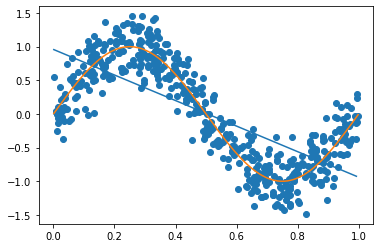

In [ ]:
# FOR M=1
  #Where lambda = 2 ** -7
pre = prediction(U1,X_test,1)
pre = pre[0]
plt.plot(X_test,pre)
plt.scatter(X_train, Y_train)
plt.plot(X_train, np.sin(2*(X_train)*math.pi))
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

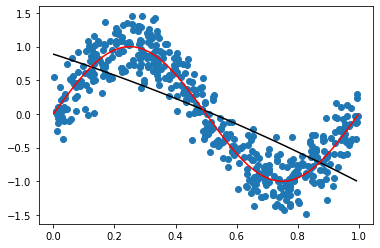

In [ ]:
# FOR M=2
  #Where lambda = 2 ** -7
# pr = np.dot(matrix_A(T_train[:50], 1) ,U1[0])
pre = prediction(U2,X_test,2)
pre = pre[0]
plt.plot(X_test,pre , color ="black")
plt.scatter(X_train, Y_train)
plt.plot(X_train, np.sin(2*(X_train)*math.pi) , color="red")
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

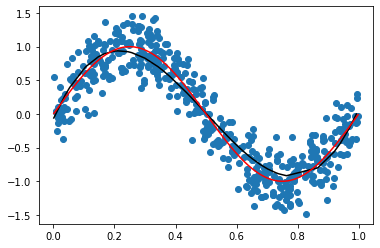

In [ ]:
from matplotlib.patches import colors
# FOR M=3
  #Where lambda = 2 ** -7
# pr = np.dot(matrix_A(T_train[:50], 1) ,U1[0])
pre = prediction(U3,X_test,3)
pre = pre[0]
plt.plot(X_test,pre , color='black'  )
plt.scatter(X_train, Y_train)
plt.plot(X_train, np.sin(2*(X_train)*math.pi) , color ="red")
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

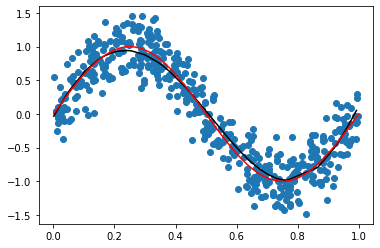

In [ ]:
# FOR M=7
  #Where lambda = 2 ** -7
pre = prediction(U7,X_test,7)
pre = pre[0]
plt.plot(X_test,pre , color ="black")
plt.scatter(X_train, Y_train)
plt.plot(X_train, np.sin(2*(X_train)*math.pi) , color = "red")
plt.legend

#h) Plot the estimate obtained by regularized least squared polynomial
#regression models for order k =1,2,3 and 7 for testing set along with y’1, y’2,..
#, y’50. Also plot the sin(2 π x’i) . Study the effect of regularization parameter
#λ on testing RMSE and flexibility of curve and list your

<function matplotlib.pyplot.legend(*args, **kwargs)>

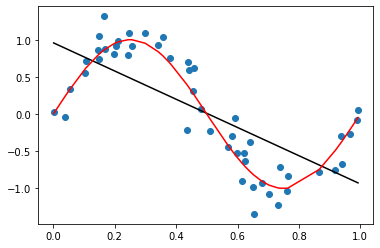

In [ ]:
# FOR M=1
  #Where lambda = 2 ** -7
pre = prediction(U1,X_test,1)
pre = pre[0]
plt.plot(X_test,pre , color ="black")
plt.scatter(X_test, Y_test)
plt.plot(X_test, np.sin(2*(X_test)*math.pi) , color = "red")
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

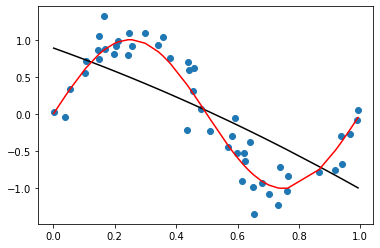

In [ ]:
# FOR M=2
  #Where lambda = 2 ** -7
pre = prediction(U2,X_test,2)
pre = pre[0]
plt.plot(X_test,pre , color ="black")
plt.scatter(X_test, Y_test)
plt.plot(X_test, np.sin(2*(X_test)*math.pi) , color = "red")
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

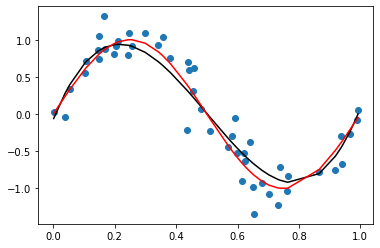

In [ ]:
# FOR M=3
  #Where lambda = 2 ** -7
pre = prediction(U3,X_test,3)
pre = pre[0]
plt.plot(X_test,pre , color ="black")
plt.scatter(X_test, Y_test)
plt.plot(X_test, np.sin(2*(X_test)*math.pi) , color = "red")
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

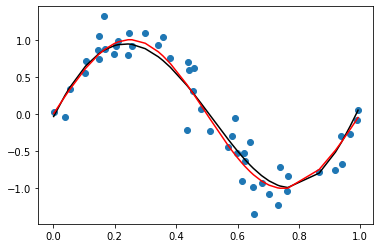

In [ ]:
# FOR M=7
  #Where lambda = 2 ** -7
pre = prediction(U7,X_test,7)
pre = pre[0]
plt.plot(X_test,pre , color ="black")
plt.scatter(X_test, Y_test)
plt.plot(X_test, np.sin(2*(X_test)*math.pi) , color = "red")
plt.legend

In [ ]:
U20 = finding_U(500,T_train)


<function matplotlib.pyplot.legend(*args, **kwargs)>

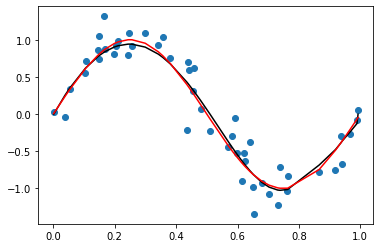

In [ ]:
# FOR M=20
  #Where lambda = 2 ** -7
pre = prediction(U20,X_test,500)
pre = pre[0]
plt.plot(X_test,pre , color ="black")
plt.scatter(X_test, Y_test)
plt.plot(X_test, np.sin(2*(X_test)*math.pi) , color = "red")
plt.legend

#OBSERVATION
1. As we increase lamda value RMSE will increase so we are taking optimise value where RMSE is least.
2.Taking higher degree will decrease error.
3.Without regularisation(lamda perameter), when we increase our degree our data will be overfitted as we see in assignment 2.
4.Using Regularization, we can fit our machine learning model appropriately on a given test set and hence reduce the errors in it

#2.Bivariate Case :

# a) Construct the training set T = {(x1,y1),(x2,y2),......,(x200,y200)} using the relation
#Yi = sin (2 π (||xi||) + εi where εi ~ N (0,0.25) and xi = [xi1,xi2], where xi1 and
#xi2 are from U[0,1]. In the similar way construct a testing set of size 50
#Test = { (x’1,y’1),(x’2,y’2),......,(x’50,y’50)} .

#CONSTRUCTIONG TRAINING SET

In [ ]:
X1 = np.random.uniform(0,1,200)
X2 = np.random.uniform(0,1,200)
X1.sort()
X2.sort()
error  = np.random.normal(0,0.25, 200)
Y = np.sin(2 * 3.14* np.sqrt( X1**2 + X2**2 )) + error
T_train = pd.DataFrame({'X1':X1 , 'X2':X2 , 'Y':Y})

In [ ]:
X_train = T_train[['X1','X2']]
Y_train = T_train['Y']

#Constructing testing set 

In [ ]:
X1_test = np.random.uniform(0,1,50)
X2_test = np.random.uniform(0,1,50)
X1_test.sort()
X2_test.sort()
error  = np.random.normal(0,0.25, 50)
Y_test = np.sin(2 * 3.14* np.sqrt( X1_test**2 + X2_test**2 )) + error
T_test = pd.DataFrame({'X1_test':X1_test , 'X2_test':X2_test , 'Y_test':Y_test})

In [ ]:
X_test = T_test[['X1_test','X2_test']]
Y_test = T_test['Y_test']

#b) Obtain the prediction on testing set and compute the RMSE for regularized
#least squared polynomial regression models for order k =1,2 and 3. Also plot
#the estimated function and target function for the training set and testing set.

#FOR K=1

In [ ]:
mat_A = pd.DataFrame([T_train['X1'] , T_train['X2'] , np.ones(500)]).T
mat_A.columns = ['X1','X2' ,'one']
lamda = 2**(-7)
AtA = np.dot(mat_A.T,mat_A)
mat_I = np.identity(len(AtA))
tem_mat1 = np.linalg.inv( (lamda*mat_I) + AtA )
tem_mat2 = np.dot(mat_A.T,Y_train)

U1 =  np.dot(tem_mat1,tem_mat2)
U ={}
U[1] = U1

#For K=2

In [ ]:
mat_A = pd.DataFrame([T_train['X1']**2 , T_train['X2']**2 ,T_train['X1']*T_train['X2'],T_train['X1'] , T_train['X2'], np.ones(500)]).T
mat_A.columns = ['X1^2','X2^2' ,'X1X2' , 'X1', 'X2' , 'one']
lamda = 2**(-7)
AtA = np.dot(mat_A.T,mat_A)
mat_I = np.identity(len(AtA))
tem_mat1 = np.linalg.inv( (lamda*mat_I) + AtA )
tem_mat2 = np.dot(mat_A.T,Y_train)

U2 =  np.dot(tem_mat1,tem_mat2)
U ={}
U[2] = U2

#For K=3

In [ ]:
mat_A = pd.DataFrame([T_train['X1']**3 , T_train['X2']**3 ,(T_train['X1']**2)*T_train['X2'], (T_train['X2']**2)*T_train['X1'],T_train['X1']**2 , T_train['X2']**2,T_train['X1']*T_train['X2'],T_train['X1'],T_train['X2'], np.ones(500)]).T
mat_A.columns = ['X1^3','X2^3','X1^2X2','X1X2^2','X1^2','X2^2' ,'X1X2' , 'X1', 'X2' , 'one']
lamda = 2**(-7)
AtA = np.dot(mat_A.T,mat_A)
mat_I = np.identity(len(AtA))
tem_mat1 = np.linalg.inv( (lamda*mat_I) + AtA )
tem_mat2 = np.dot(mat_A.T,Y_train)

U3 =  np.dot(tem_mat1,tem_mat2)
U ={}
U[3] = U3

#FINDING RMSE

In [ ]:
#computing the RMSE for polynomial regression models 
import math
def RMSE(Ypred,Yactual):
  rmse = math.sqrt( sum((Ypred - Yactual)**2) / (len(Ypred))  )
  
  return rmse

#For K=1

In [ ]:
mat_A = pd.DataFrame([T_train['X1'] , T_train['X2'] , np.ones(500)]).T
mat_A.columns = ['X1','X2' ,'one']
Y_pred = np.dot(mat_A,U1)
RMSE_train_k1 = RMSE(Y_pred,Y_train)

In [ ]:
mat_A = pd.DataFrame([T_test['X1_test'] , T_test['X2_test'] , np.ones(50)]).T
mat_A.columns = ['X1_test','X2_test' ,'one']
Y_pred = np.dot(mat_A,U1)
RMSE_test_k1 = RMSE(Y_pred,Y_test) 

##For K=2

In [ ]:
mat_A = pd.DataFrame([T_train['X1']**2 , T_train['X2']**2 ,T_train['X1']*T_train['X2'],T_train['X1'] , T_train['X2'], np.ones(500)]).T
mat_A.columns = ['X1^2','X2^2' ,'X1X2' , 'X1', 'X2' , 'one']
Y_pred = np.dot(mat_A,U2)
RMSE_train_k2 = RMSE(Y_pred,Y_train)

In [ ]:
mat_A = pd.DataFrame([T_test['X1_test']**2 , T_test['X2_test']**2 ,T_test['X1_test']*T_test['X2_test'],T_test['X1_test'] , T_test['X2_test'], np.ones(500)]).T
mat_A.columns = ['X1^2','X2^2' ,'X1X2' , 'X1', 'X2' , 'one']
Y_pred = np.dot(mat_A,U2)
RMSE_test_k2 = RMSE(Y_pred,Y_test)

#K=3

In [ ]:
mat_A = pd.DataFrame([T_train['X1']**3 , T_train['X2']**3 ,(T_train['X1']**2)*T_train['X2'], (T_train['X2']**2)*T_train['X1'],T_train['X1']**2 , T_train['X2']**2,T_train['X1']*T_train['X2'],T_train['X1'],T_train['X2'], np.ones(500)]).T
mat_A.columns = ['X1^3','X2^3','X1^2X2','X1X2^2','X1^2','X2^2' ,'X1X2' , 'X1', 'X2' , 'one']
Y_pred = np.dot(mat_A,U3)
RMSE_train_k3 = RMSE(Y_pred,Y_train)

In [ ]:
mat_A = pd.DataFrame([T_test['X1_test']**3 , T_test['X2_test']**3 ,(T_test['X1_test']**2)*T_test['X2_test'], (T_test['X2_test']**2)*T_test['X1_test'],T_test['X1_test']**2 , T_test['X1_test']**2,T_test['X1_test']*T_test['X2_test'],T_test['X1_test'],T_test['X2_test'], np.ones(500)]).T
mat_A.columns = ['X1^3','X2^3','X1^2X2','X1X2^2','X1^2','X2^2' ,'X1X2' , 'X1', 'X2' , 'one']
Y_pred = np.dot(mat_A,U3)
RMSE_test_k3 = RMSE(Y_pred,Y_test)

##Printing RMSE

In [ ]:
#Printing RMSE

print("RMSE OF ALL  TRAINING SET WHERE K=1:",RMSE_train_k1)
print("RMSE OF ALL  TRAINING SET WHERE K=2:",RMSE_train_k2)
print("RMSE OF ALL  TRAINING SET WHERE K=3:",RMSE_train_k3)
print()
print("RMSE OF ALL  TESTING SET WHERE K=1:",RMSE_test_k1)
print("RMSE OF ALL  TESTING SET WHERE K=2:",RMSE_test_k2)
print("RMSE OF ALL  TESTING SET WHERE K=3:",RMSE_test_k3)

RMSE OF ALL  TRAINING SET WHERE K=1: 0.4955311347748121
RMSE OF ALL  TRAINING SET WHERE K=2: 0.45730357479882056
RMSE OF ALL  TRAINING SET WHERE K=3: 0.43650123775541194

RMSE OF ALL  TESTING SET WHERE K=1: 0.655653185723872
RMSE OF ALL  TESTING SET WHERE K=2: 0.5890013046348608
RMSE OF ALL  TESTING SET WHERE K=3: 1.4803324818281576


#PLOTTING FOR TRAINING SET

#for k=1

In [ ]:
mat_A = pd.DataFrame([T_train['X1'] , T_train['X2'] , np.ones(500)]).T
mat_A.columns = ['X1','X2' ,'one']
Y_pred_k1 = np.dot(mat_A , U1)

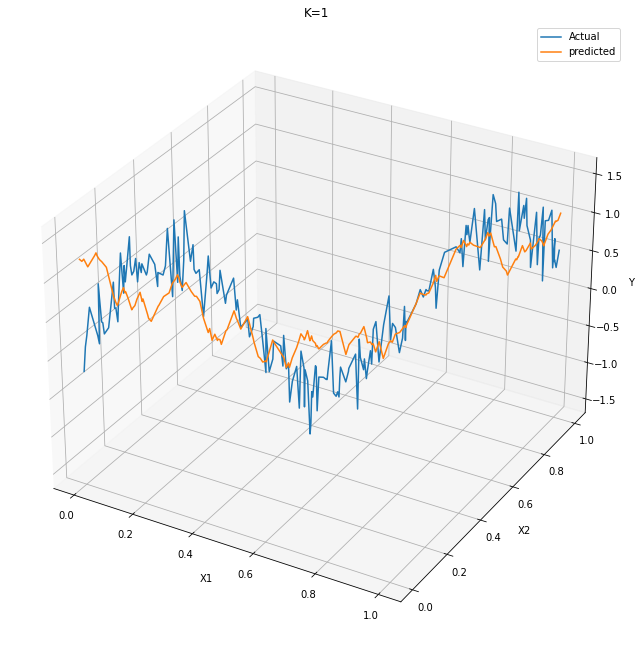

In [ ]:
fig = plt.figure(figsize=(30,25))
ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.plot(T_train['X1'],T_train['X2'],T_train['Y'],   label = "Actual")
ax.plot(T_train['X1'],T_train['X2'],Y_pred_k1,      label = 'predicted')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Y")
ax.set_title("K=1")
ax.legend()


#For K=2

In [ ]:
mat_A = pd.DataFrame([T_train['X1']**2 , T_train['X2']**2 ,T_train['X1']*T_train['X2'],T_train['X1'] , T_train['X2'], np.ones(500)]).T
mat_A.columns = ['X1^2','X2^2' ,'X1X2' , 'X1', 'X2' , 'one']
Y_pred_k2 = np.dot(mat_A , U2)

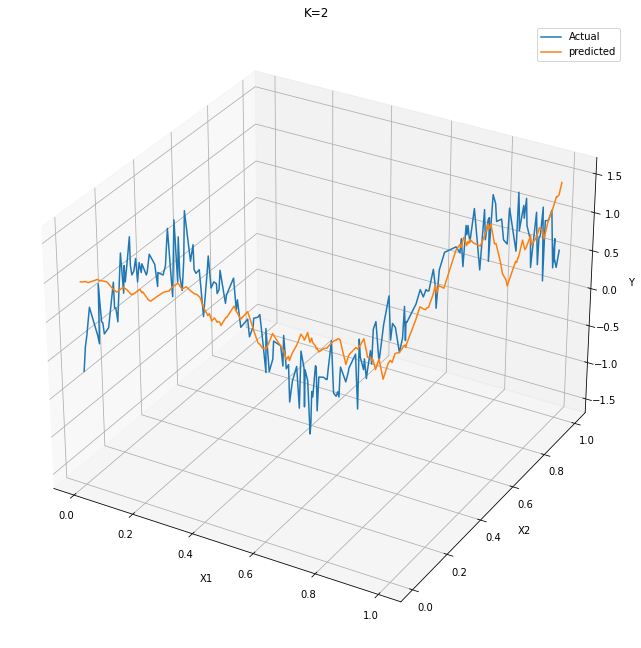

In [ ]:
fig = plt.figure(figsize=(30,25))
ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.plot(T_train['X1'],T_train['X2'],T_train['Y'],   label = "Actual")
ax.plot(T_train['X1'],T_train['X2'],Y_pred_k2,      label = 'predicted')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Y")
ax.set_title("K=2")
ax.legend()

#For K=3

In [ ]:
mat_A = pd.DataFrame([T_train['X1']**3 , T_train['X2']**3 ,(T_train['X1']**2)*T_train['X2'], (T_train['X2']**2)*T_train['X1'],T_train['X1']**2 , T_train['X2']**2,T_train['X1']*T_train['X2'],T_train['X1'],T_train['X2'], np.ones(500)]).T
mat_A.columns = ['X1^3','X2^3','X1^2X2','X1X2^2','X1^2','X2^2' ,'X1X2' , 'X1', 'X2' , 'one']
Y_pred_k3 = np.dot(mat_A , U3)

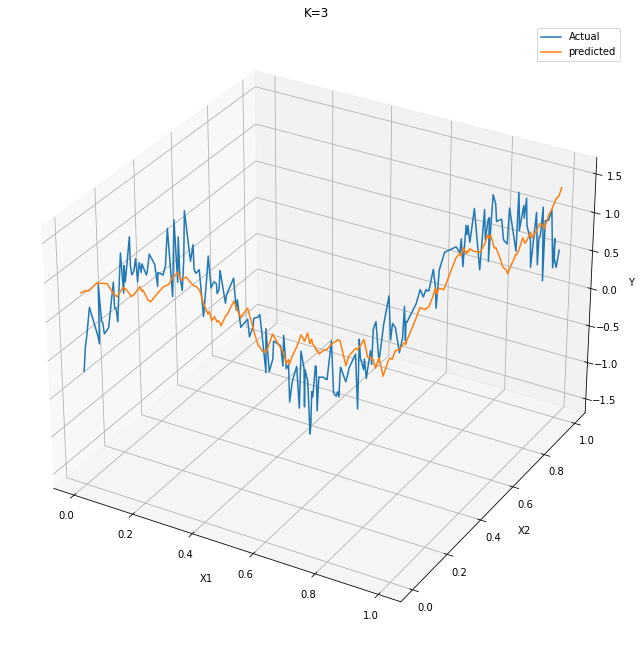

In [ ]:
fig = plt.figure(figsize=(30,25))
ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.plot(T_train['X1'],T_train['X2'],T_train['Y'],   label = "Actual")
ax.plot(T_train['X1'],T_train['X2'],Y_pred_k3,      label = 'predicted')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Y")
ax.set_title("K=3")
ax.legend()

#Plotting for Testing set

In [ ]:
mat_A = pd.DataFrame([T_test['X1_test'] , T_test['X2_test'] , np.ones(50)]).T
mat_A.columns = ['X1','X2' ,'one']
Y_pred_k1 = np.dot(mat_A , U1)

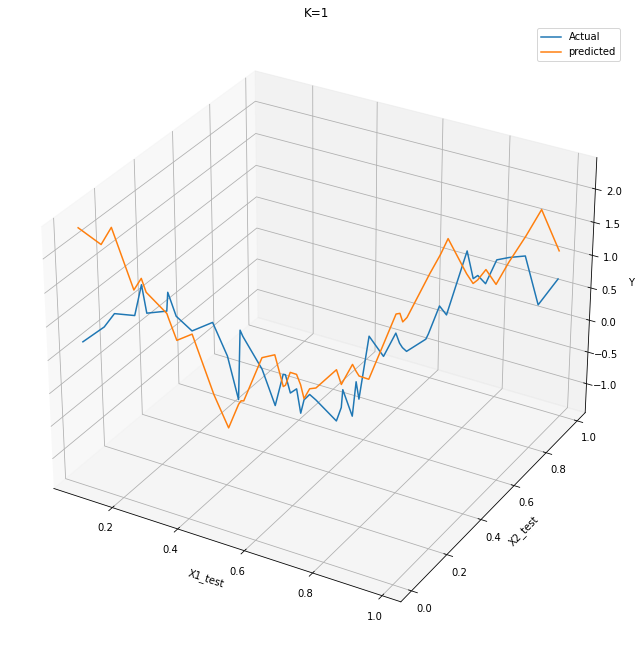

In [ ]:
fig = plt.figure(figsize=(30,25))
ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.plot(T_test['X1_test'],T_test['X2_test'],T_test['Y_test'],   label = "Actual")
ax.plot(T_test['X1_test'],T_test['X2_test'],Y_pred_k1,      label = 'predicted')
ax.set_xlabel("X1_test")
ax.set_ylabel("X2_test")
ax.set_zlabel("Y")
ax.set_title("K=1")
ax.legend()

In [ ]:
mat_A = pd.DataFrame([T_test['X1_test']**2 , T_test['X2_test']**2 ,T_test['X1_test']*T_test['X2_test'],T_test['X1_test'] , T_test['X2_test'], np.ones(500)]).T
mat_A.columns = ['X1^2','X2^2' ,'X1X2' , 'X1', 'X2' , 'one']
Y_pred_k2 = np.dot(mat_A , U2)

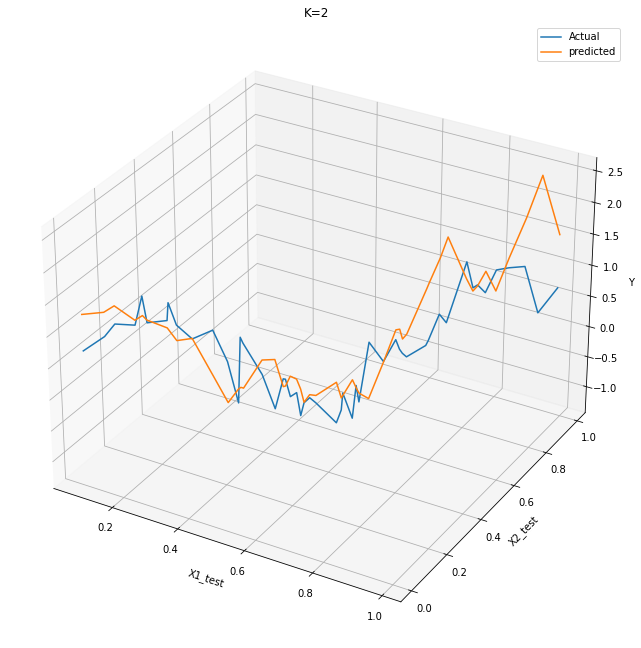

In [ ]:
fig = plt.figure(figsize=(30,25))
ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.plot(T_test['X1_test'],T_test['X2_test'],T_test['Y_test'],   label = "Actual")
ax.plot(T_test['X1_test'],T_test['X2_test'],Y_pred_k2,      label = 'predicted')
ax.set_xlabel("X1_test")
ax.set_ylabel("X2_test")
ax.set_zlabel("Y")
ax.set_title("K=2")
ax.legend()

In [ ]:
mat_A = pd.DataFrame([T_test['X1_test']**3 , T_test['X2_test']**3 ,(T_test['X1_test']**2)*T_test['X2_test'], (T_test['X2_test']**2)*T_test['X1_test'],T_test['X1_test']**2 , T_test['X1_test']**2,T_test['X1_test']*T_test['X2_test'],T_test['X1_test'],T_test['X2_test'], np.ones(500)]).T
mat_A.columns = ['X1^3','X2^3','X1^2X2','X1X2^2','X1^2','X2^2' ,'X1X2' , 'X1', 'X2' , 'one']
Y_pred_k3 = np.dot(mat_A , U3)

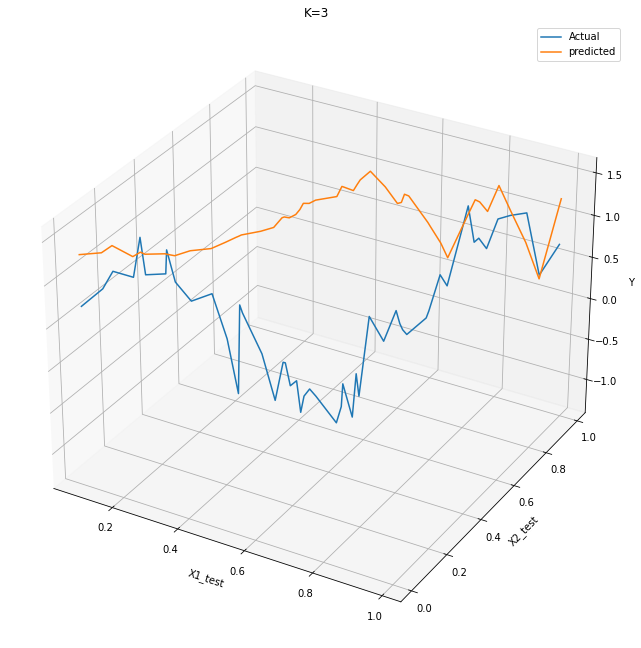

In [ ]:
fig = plt.figure(figsize=(30,25))
ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.plot(T_test['X1_test'],T_test['X2_test'],T_test['Y_test'],   label = "Actual")
ax.plot(T_test['X1_test'],T_test['X2_test'],Y_pred_k3,      label = 'predicted')
ax.set_xlabel("X1_test")
ax.set_ylabel("X2_test")
ax.set_zlabel("Y")
ax.set_title("K=3")
ax.legend()

#REALWORLD DATASET

#a) Consider the motorcycle dataset. Estimate the Regularized Least Square
#regression models using the M sigmoidal basis functions. The kth sigmoidal
#basis function can be obtained using

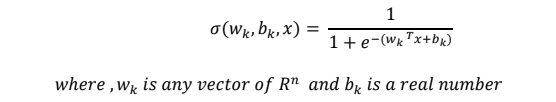 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
motor_data = pd.read_excel("/content/drive/MyDrive/ML/Datasets/motorcycle.xlsx") 

In [ ]:
motor_data

,x,y
0,2.4,0.0
1,2.6,-1.3
2,3.2,-2.7
3,3.6,0.0
4,4.0,-2.7
...,...,...
128,53.2,-14.7
129,55.0,-2.7
130,55.0,10.7
131,55.4,-2.7


In [ ]:
x = np.array(motor_data['x'])
y = np.array(motor_data['y'])

#Making A Matrix

In [ ]:
def sigmoid(x,k):
    #w= []  #Alpha 
    #b= []  #beta
    # np.random.seed(100)
    np.random.seed(100)
    w = [np.random.rand() for i in range(k)]
    b = [np.random.rand() for j in range(k)]

    #Matrix A
    mat_A = []
    for i in range(k):
      sigma = 1/(1 + np.exp( (-1)*( w[i]*x  + b[i])  ) )
      mat_A.append(sigma)
      
    one = np.ones(len(x))
    mat_A.append(one)
    mat_A = np.array(mat_A)
    mat_A = mat_A.T
    return mat_A
  

#FINDING U=[W2,w1,b] if k=2  where 

#U For K =2

In [ ]:
mat_A = sigmoid(x,2)

lamda = 2**(-7)
AtA = np.dot(mat_A.T,mat_A)
mat_I = np.identity(len(AtA))
tem_mat1 = np.linalg.inv( (lamda*mat_I) + AtA )
tem_mat2 = np.dot(mat_A.T,y)

U2 =  np.dot(tem_mat1,tem_mat2)
U ={}
U[2] = U2
print('U = ',U)

U =  {2: array([  91.85857188, -248.26603931,  128.53959735])}


#U for k=5

In [ ]:
mat_A = sigmoid(x,5)

lamda = 2**(-7)
AtA = np.dot(mat_A.T,mat_A)
mat_I = np.identity(len(AtA))
tem_mat1 = np.linalg.inv( (lamda*mat_I) + AtA )
tem_mat2 = np.dot(mat_A.T,y)

U5 =  np.dot(tem_mat1,tem_mat2)
U[5] = U5
print('U = ',U)

U =  {2: array([  91.85857188, -248.26603931,  128.53959735]), 5: array([ 324.24743182, -617.26166333,  -69.21483903,    7.23958826,
       1189.46612616, -469.85040849])}


#U for k=10

In [ ]:
mat_A = sigmoid(x,10)

lamda = 2**(-7)
AtA = np.dot(mat_A.T,mat_A)
mat_I = np.identity(len(AtA))
tem_mat1 = np.linalg.inv( (lamda*mat_I) + AtA )
tem_mat2 = np.dot(mat_A.T,y)

U10 =  np.dot(tem_mat1,tem_mat2)
U[10] = U10
print('U = ',U)

U =  {2: array([  91.85857188, -248.26603931,  128.53959735]), 5: array([ 324.24743182, -617.26166333,  -69.21483903,    7.23958826,
       1189.46612616, -469.85040849]), 10: array([ -53.11144133, -589.42970747,  285.43332655,   -1.44782751,
       1144.25315008,  208.57533475, -116.87483243,   -8.1136079 ,
       -154.28490551,  250.96459185, -520.79336427])}


#FINDING ESTIMATION AND RMSE

In [ ]:
#computing the RMSE for polynomial regression models 
import math
def RMSE(Ypred,Yactual):
  rmse = math.sqrt( sum((Ypred - Yactual)**2) / (len(Ypred))  )
  
  return rmse

#K=2

In [ ]:
mat_A = sigmoid(x,2)
Y_pred_2 = np.dot(mat_A,U2)
RMSE_train_k2 = RMSE(Y_pred_2,y)

#K5

In [ ]:
mat_A = sigmoid(x,5)
Y_pred_5 = np.dot(mat_A,U5)
RMSE_train_k5 = RMSE(Y_pred_5,y)

#K=10

In [ ]:
mat_A = sigmoid(x,10)
Y_pred_10 = np.dot(mat_A,U10)
RMSE_train_k10 = RMSE(Y_pred_10,y)

In [ ]:
#Printing RMSE

print("RMSE OF ALL  TRAINING SET WHERE K=2:",RMSE_train_k2)
print("RMSE OF ALL  TRAINING SET WHERE K=5:",RMSE_train_k5)
print("RMSE OF ALL  TRAINING SET WHERE K=10:",RMSE_train_k10)

RMSE OF ALL  TRAINING SET WHERE K=2: 47.68118701086866
RMSE OF ALL  TRAINING SET WHERE K=5: 43.157828030953645
RMSE OF ALL  TRAINING SET WHERE K=10: 42.658801584752986


#OBSERVATION  - As we increase degree RMSE will decrease

#PLOTTING FOR TRAINING SET

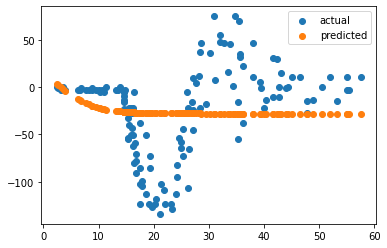

In [ ]:
#plot for k=2
plt.scatter(x,y , label ='actual')
plt.scatter(x,Y_pred_2 , label = 'predicted')

plt.legend()
plt.show()

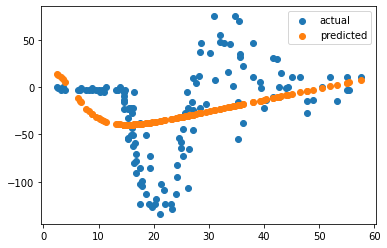

In [ ]:
#plot for k=5
plt.scatter(x,y , label ='actual')
plt.scatter(x,Y_pred_5 , label = 'predicted')

plt.legend()
plt.show()

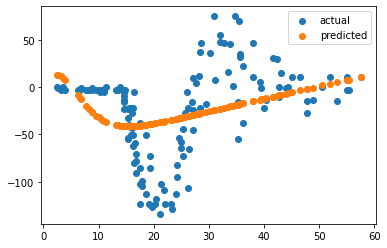

In [ ]:
#plot for k=10
plt.scatter(x,y , label ='actual')
plt.scatter(x,Y_pred_10 , label = 'predicted')

plt.legend()
plt.show()

#II. For M =10, find the minimum mean and standard deviations of RMSE using
#leave-one out method by tuning the parameter λ.

In [ ]:
rmse_values=[]
for i in range(len(x)):
  x_temp = list(x)
  y_temp = list(y)
  x_temp.pop(i)
  y_temp.pop(i)
  A_train = sigmoid(np.array(x_temp) , 10)

  #for u
  lamda = 2**(-7)
  AtA = np.dot(A_train.T,A_train)
  mat_I = np.identity(len(AtA))
  tem_mat1 = np.linalg.inv( (lamda*mat_I) + AtA )
  tem_mat2 = np.dot(A_train.T,y_temp)
  U =  np.dot(tem_mat1,tem_mat2)

  A_test = sigmoid(np.array([x[i]]) ,10)
  y_esti = np.dot(A_test,U)
  rmse = RMSE(y_esti,y[i])
  rmse_values.append(rmse)
print("Min RMSE: ",min(rmse_values))
print("Mean RMSE: ",np.mean(np.array(rmse_values)))
print("Standard deviation RMSE: ",np.std(np.array(rmse_values)))


Min RMSE:  0.14342433751510342
Mean RMSE:  34.21396885383804
Standard deviation RMSE:  26.551379528774618


III Estimate the Regularized Least Square kernel regression model using
Gaussian kernel which is given by<br>
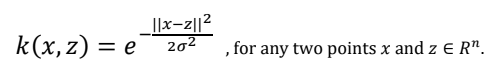
<br>
Also, find the minimum mean and standard deviations of RMSE using leave-
one out method by tuning the parameter λ and kernel parameter σ .

In [ ]:
#rmse
def rmse(y,yhat):
  rmse= np.sqrt(np.mean((y - yhat)**2))
  return rmse

In [ ]:
def kernel_matrix(X, sigma):
  N = len(X)
  fi = np.zeros((N, N))
  for i in range(N):
    for j in range(N):
      fi[i][j] = np.exp(-(np.linalg.norm([X[i], X[j]])) / 2*(sigma**2))
  return fi

In [ ]:
def train_kernel_model(X, y):
  
  lambda_values = [2**i for i in range(-7, 8)]
  sigma_values = [2**i for i in range(-5, 6)]

  W = []

  error_dict = {}
  for i, l in enumerate(lambda_values):
    for j, s in enumerate(sigma_values):
      try:
        fi = kernel_matrix(X, s)
        I = np.identity(len(fi.T))
        w = np.linalg.inv(fi.T @ fi + l*I) @ fi.T @ y

        y_pred = y @ w

        W.append(w)

        error = rmse(y_pred,y)
        error_dict[f'({i},{j})'] = error
      except np.linalg.LinAlgError as e:
        continue

  error_keys = list(error_dict.keys())
  error_values = list(error_dict.values())
  min_error = min(error_values)
  idx = error_keys[error_values.index(min_error)]
  idx = idx.replace('(', '').replace(')', '').split(",")
  min_lambda_idx = int(idx[0])
  min_sigma_idx = int(idx[1])

  coeff = W[error_values.index(min_error)]

  return coeff, lambda_values[min_lambda_idx], sigma_values[min_sigma_idx]

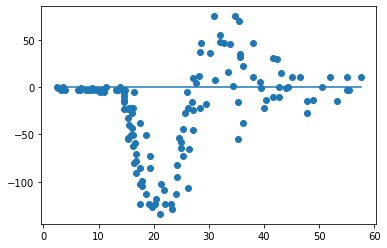

In [ ]:
W, lambda_, sigma = train_kernel_model(x, y)
lin_x = np.linspace(min(x), max(x), 133)
fx = kernel_matrix(lin_x, sigma)
fy = fx @ W
plt.scatter(x, y)#rmse
def rmse(y,yhat):
  rmse= np.sqrt(np.mean((y - yhat)**2))
  return rmse
plt.plot(lin_x, fy)